In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [3]:
zoo = pd.read_csv('Zoo.csv')
print(zoo.info())
print(zoo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
  animal name  hai


Missing Values:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64
['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


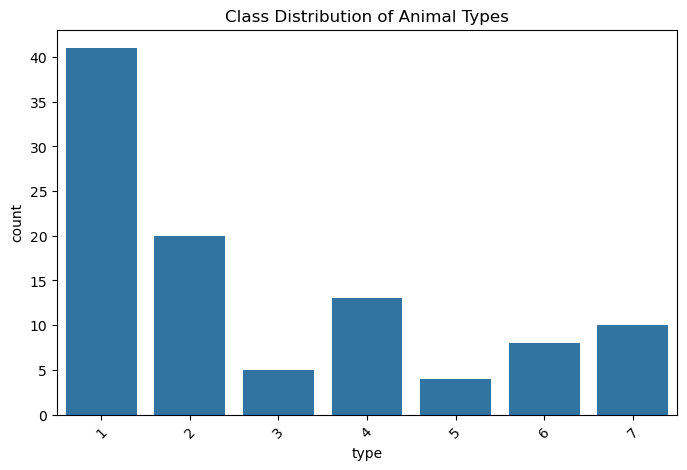

In [4]:
print("\nMissing Values:")
print(zoo.isnull().sum())
print(zoo.columns.tolist())
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=zoo)  
plt.title('Class Distribution of Animal Types')
plt.xticks(rotation=45)
plt.show()

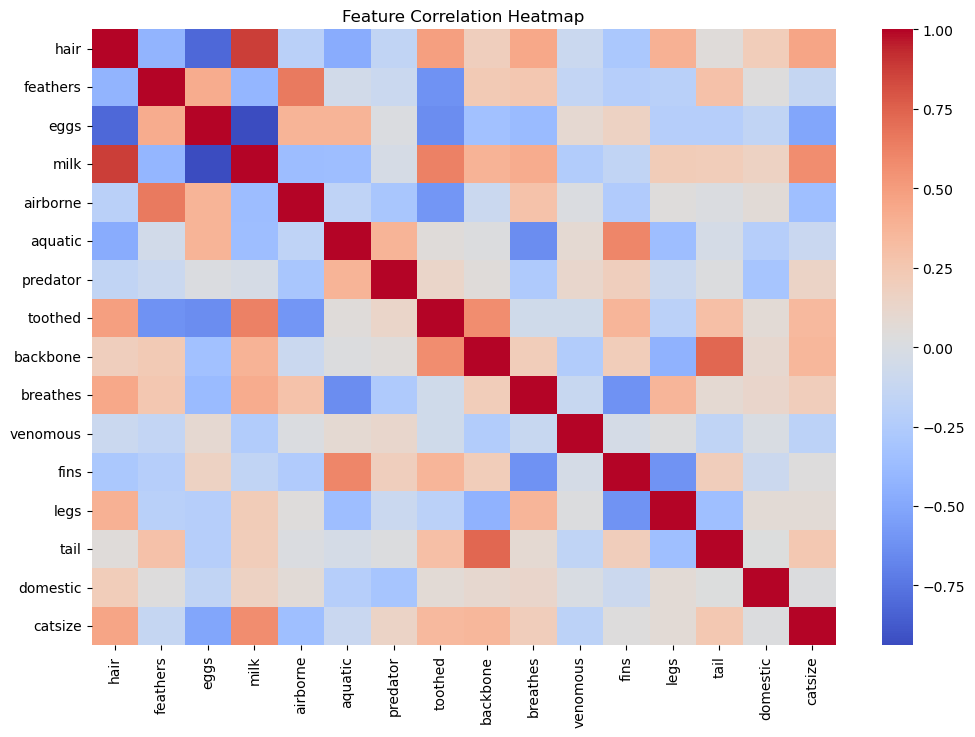

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(zoo.drop(columns=['animal name','type']).corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

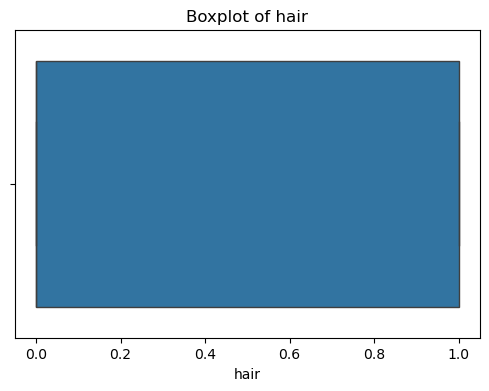

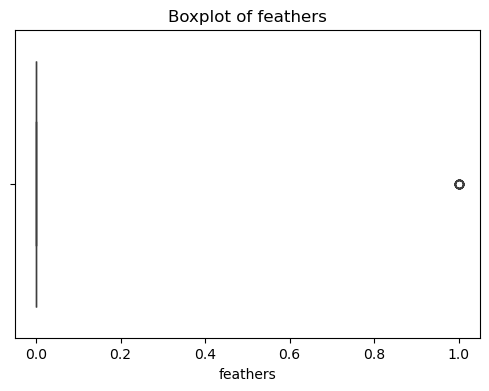

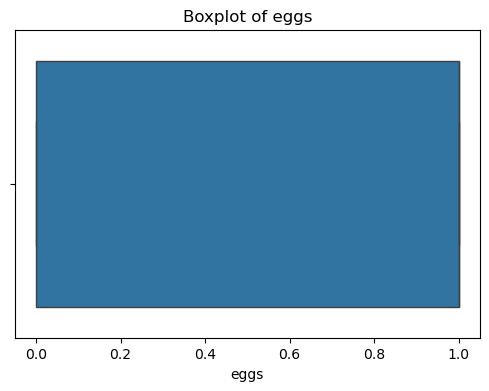

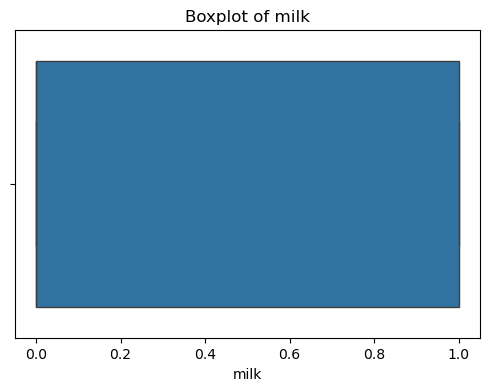

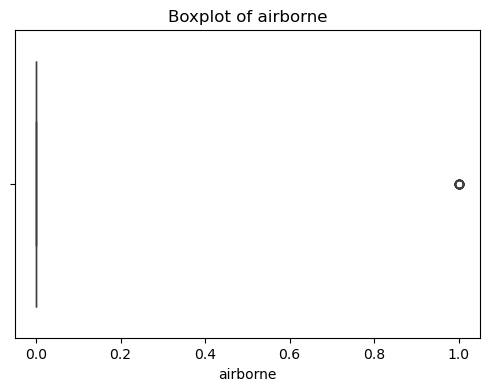

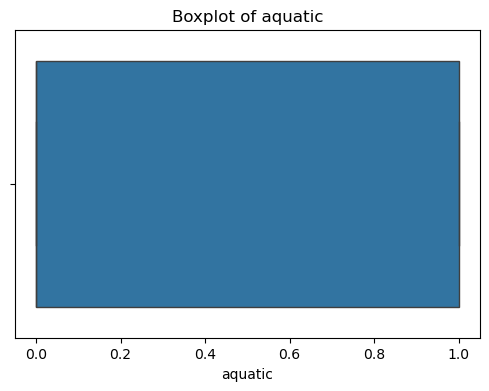

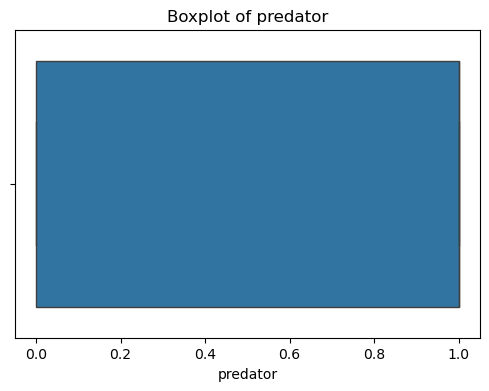

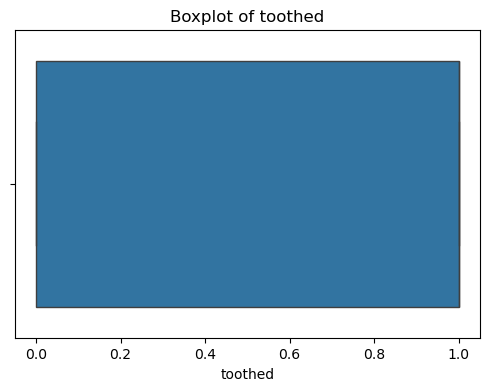

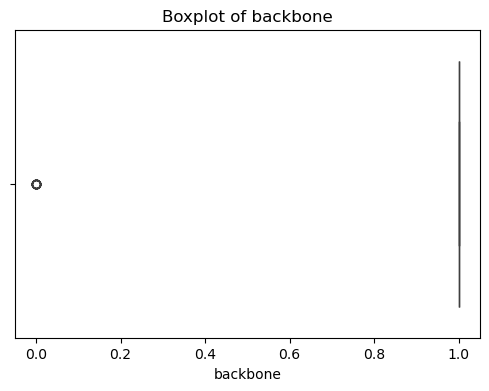

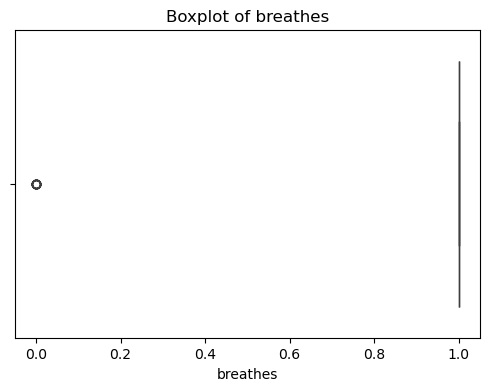

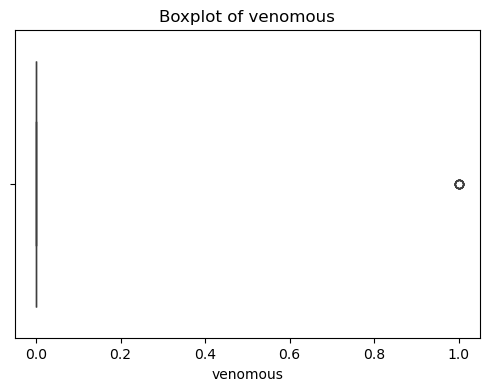

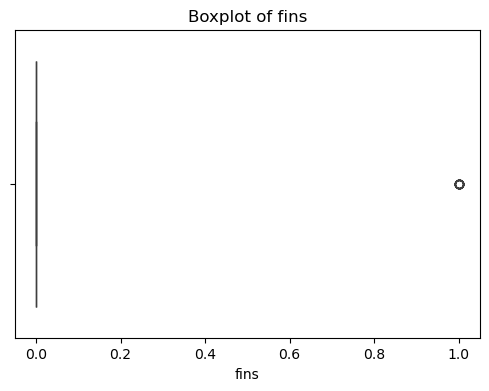

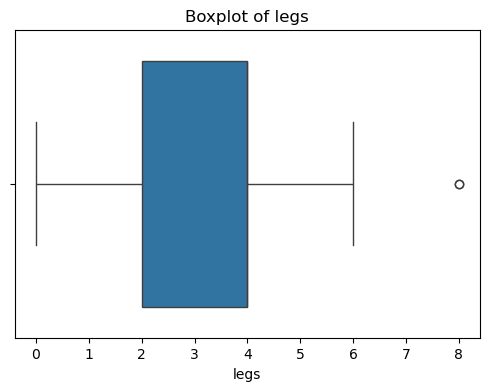

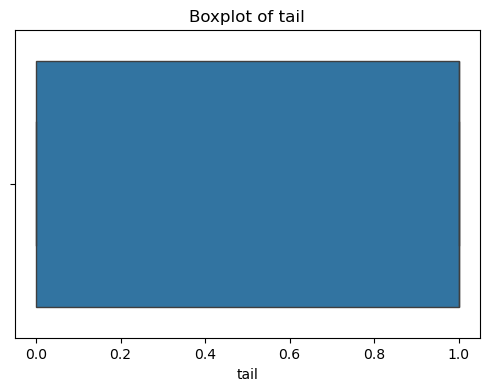

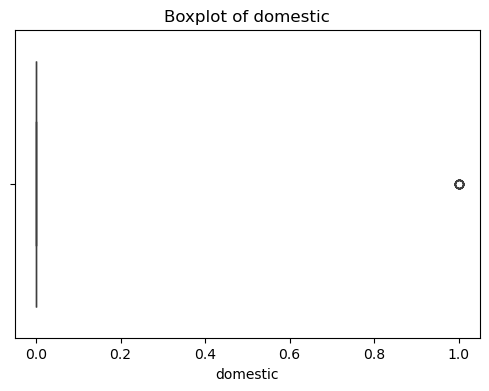

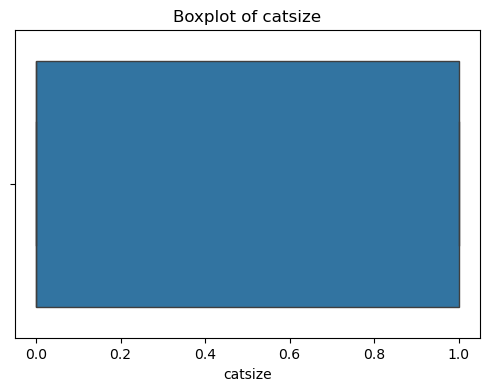

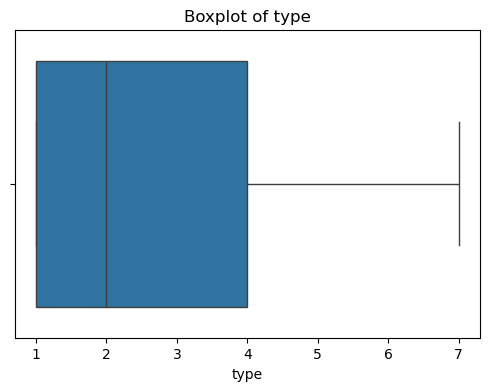

In [6]:
numeric_cols = zoo.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=zoo[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [7]:
zoo.drop(columns=['animal name'], inplace=True)

In [8]:
for col in numeric_cols:
    Q1 = zoo[col].quantile(0.25)
    Q3 = zoo[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    zoo[col] = zoo[col].clip(lower, upper)


print("\nPreprocessed Data Sample:")
print(zoo.head())


Preprocessed Data Sample:
   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  type  
0         1         0     0     4     0         0        1     1  
1         1         0     0     4     1         0        1     1  
2         1         0     0     0     1         0        0     4  
3         1         0     0     4     0         0        1     1  
4         1         0     0     4     1         0        1     1  


In [9]:
X = zoo.drop('type', axis=1)
y = zoo['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
y_pred = knn.predict(X_test)
print("\nKNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


KNN Accuracy: 0.9523809523809523

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21


Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [13]:
k = 7 
distance_metric = 'euclidean'
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [14]:
print("\nKNN Performance with k=", k, "and metric=", distance_metric)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


KNN Performance with k= 7 and metric= euclidean
Accuracy: 0.9523809523809523
Precision: 0.9166666666666666
Recall: 0.9523809523809523
F1-score: 0.9319727891156462

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21


Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [15]:
X_vis = X_train[:, :2]
X_vis_test = X_test[:, :2]


knn_vis = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
knn_vis.fit(X_vis, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [17]:
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

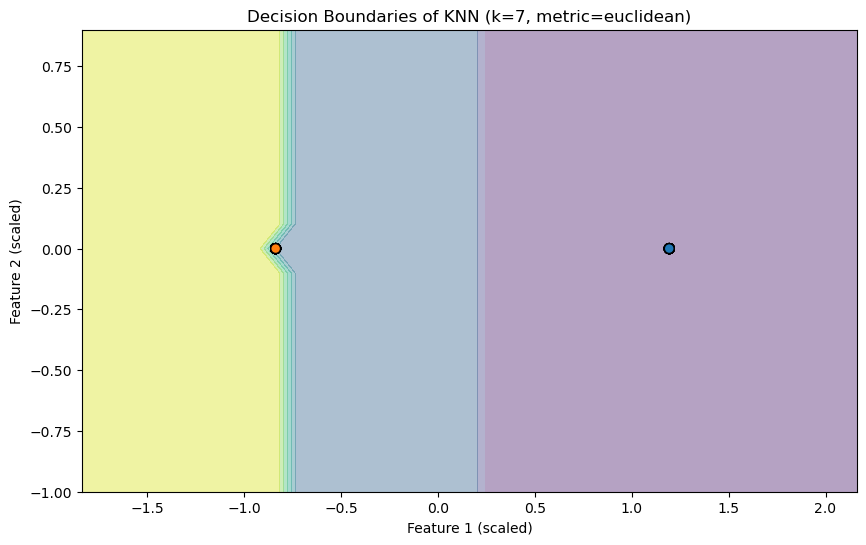

In [18]:
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolor='k', s=50, cmap='tab10')
plt.title(f'Decision Boundaries of KNN (k={k}, metric={distance_metric})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

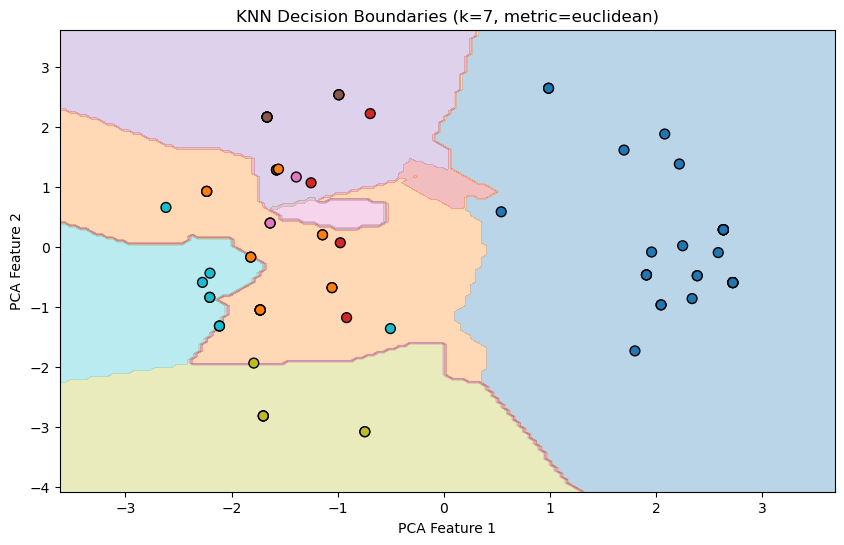

In [19]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


knn_vis = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
knn_vis.fit(X_train_pca, y_train)


x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, 
            edgecolor='k', s=50, cmap='tab10')
plt.title(f"KNN Decision Boundaries (k={k}, metric={distance_metric})")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()

